**Correlation between volatility and volume**

[*********************100%%**********************]  1 of 1 completed


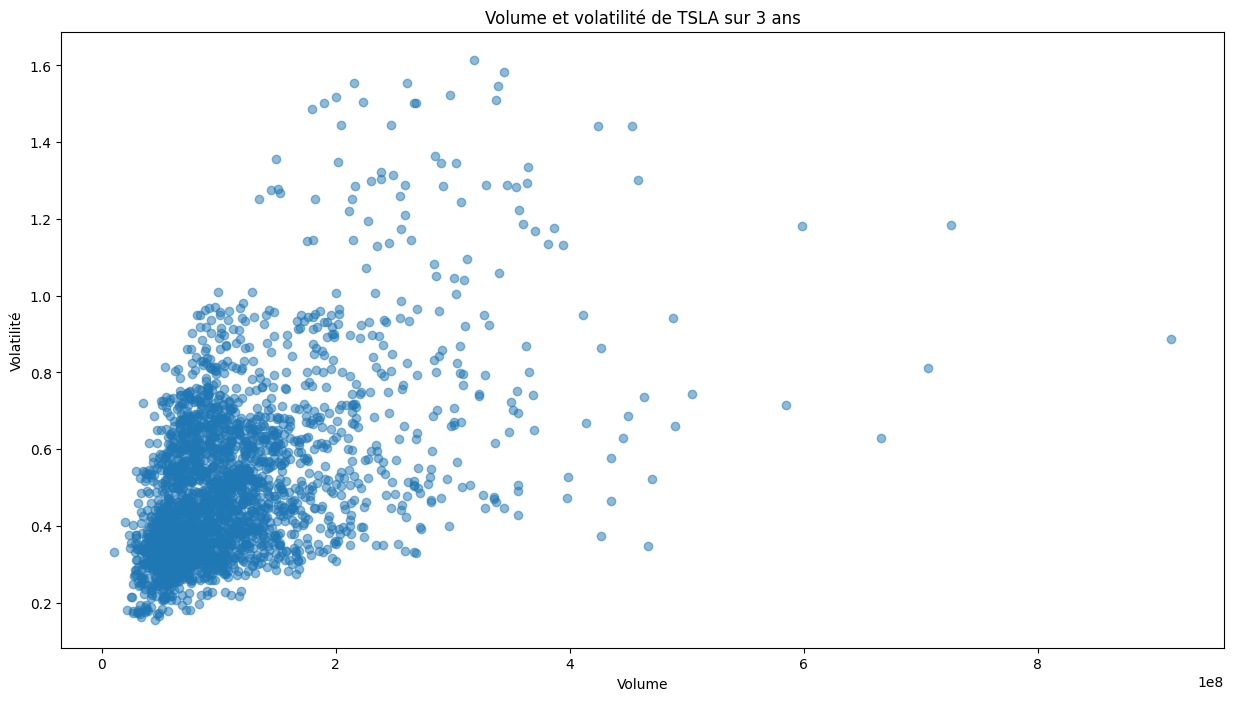

Le coefficient de corrélation entre le volume et la volatilité est de 0.50


In [ ]:
# Importer les modules nécessaires
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Choisir une action à analyser
symbol = "TSLA"

# Télécharger les données historiques de l'action sur 3 ans
data = yf.download(symbol, period="10y")

# Calculer les rendements logarithmiques quotidiens
data["log_return"] = np.log(data["Adj Close"] / data["Adj Close"].shift(1))

# Calculer la volatilité quotidienne
data["volatility"] = data["log_return"].rolling(20).std() * np.sqrt(252)

# Tracer le graphique en nuage de points
plt.figure(figsize=(15, 8))
plt.scatter(data["Volume"], data["volatility"], alpha=0.5)
plt.xlabel("Volume")
plt.ylabel("Volatilité")
plt.title(f"Volume et volatilité de {symbol} sur 3 ans")
plt.show()

# Calculer le coefficient de corrélation entre le volume et la volatilité
corr = data["Volume"].corr(data["volatility"])
print(f"Le coefficient de corrélation entre le volume et la volatilité est de {corr:.2f}")


**Volatily modelling and clustering**

**1 - MODELLING**



[*********************100%%**********************]  1 of 1 completed


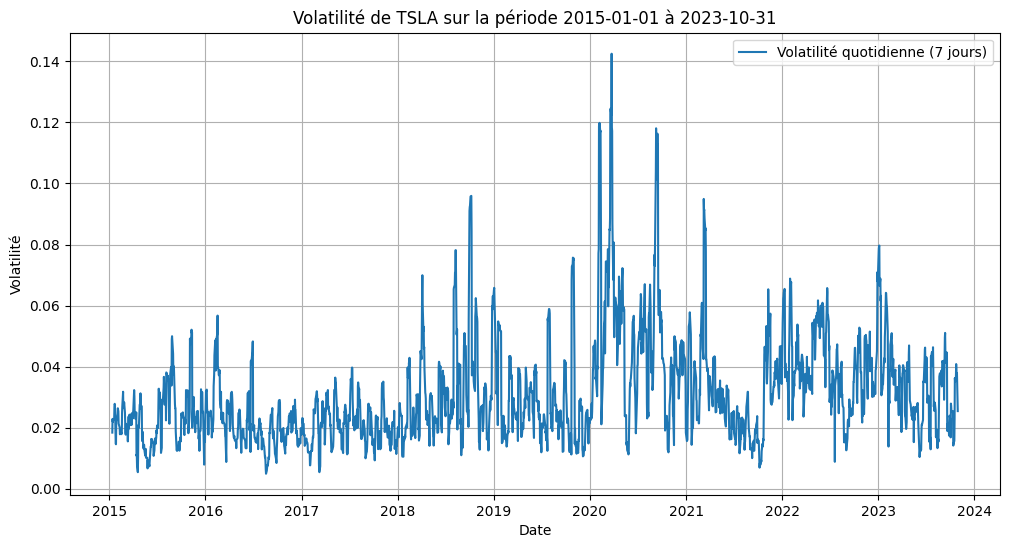

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

symbol = "TSLA"
start_date = "2015-01-01"
end_date = "2023-10-31"

data = yf.download(symbol, start=start_date, end=end_date)

daily_returns = data['Adj Close'].pct_change()

weekly_volatility = daily_returns.rolling(window=7).std()

plt.figure(figsize=(12, 6))
plt.plot(data.index, weekly_volatility, label="Volatilité quotidienne (7 jours)")
plt.title(f"Volatilité de {symbol} sur la période {start_date} à {end_date}")
plt.xlabel("Date")
plt.ylabel("Volatilité")
plt.legend()
plt.grid()
plt.show()


**2 - CLUSTERING**

[*********************100%%**********************]  1 of 1 completed
         count      mean       std       min       25%       50%       75%  \
Cluster                                                                      
0        392.0  0.005888  0.002834  0.001350  0.003295  0.005732  0.008269   
1        206.0 -0.013206  0.003629 -0.021729 -0.016108 -0.012394 -0.010138   
2        416.0 -0.003281  0.002608 -0.008217 -0.005531 -0.003102 -0.001211   
3        197.0  0.016894  0.004646  0.011411  0.013499  0.015512  0.019420   
4         40.0 -0.030385  0.006306 -0.048628 -0.034201 -0.029999 -0.024414   

              max  
Cluster            
0        0.011307  
1       -0.008396  
2        0.001267  
3        0.035245  
4       -0.022447  


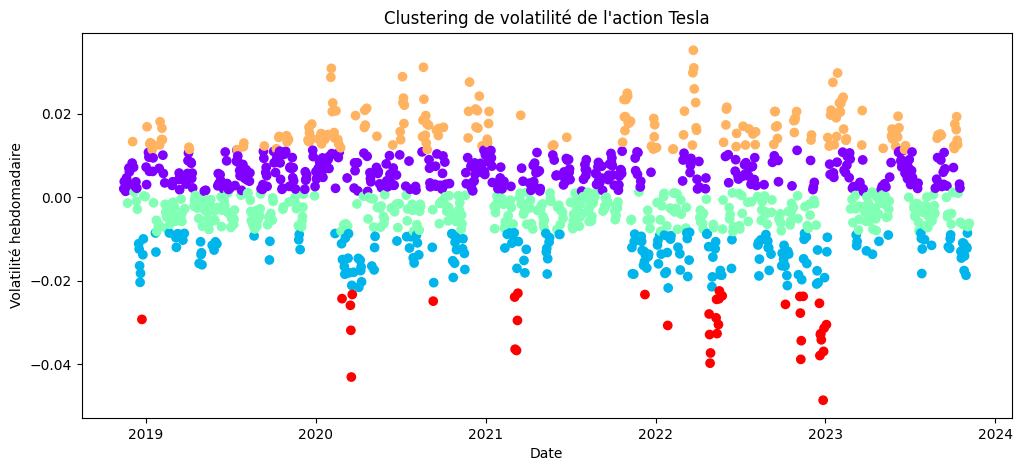

In [ ]:
# Importer les modules nécessaires
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Télécharger les données de l'action Apple (AAPL) sur une période de 5 ans
data = yf.download("TSLA", start="2018-11-07", end="2023-11-07")

# Calculer la volatilité quotidienne en utilisant le logarithme du rapport entre le prix de clôture et le prix d'ouverture
data["Volatility"] = np.log(data["Close"] / data["Open"])

# Calculer la volatilité hebdomadaire en utilisant la moyenne mobile sur 7 jours
data["Weekly Volatility"] = data["Volatility"].rolling(7).mean()

data = data.dropna(subset=["Weekly Volatility"])

# Créer un modèle de clustering K-means avec 5 clusters et spécifier n_init
model = KMeans(n_clusters=5, random_state=0, n_init=10)

# Ajuster le modèle sur la volatilité hebdomadaire
model.fit(data[["Weekly Volatility"]])

# Créer une copie explicite du DataFrame
data_copy = data.copy()

# Affecter les labels des clusters à la copie du DataFrame
data_copy["Cluster"] = model.labels_

# Remplacer le DataFrame original par la copie
data = data_copy

# Afficher les statistiques descriptives des clusters
print(data.groupby("Cluster")["Weekly Volatility"].describe())

# Visualiser les clusters sur un graphique
plt.figure(figsize=(12, 5))
plt.scatter(data.index, data["Weekly Volatility"], c=data["Cluster"], cmap="rainbow")
plt.xlabel("Date")
plt.ylabel("Volatilité hebdomadaire")
plt.title("Clustering de volatilité de l'action Tesla")
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Calculer la silhouette
silhouette_avg = silhouette_score(data[["Weekly Volatility"]], data["Cluster"])
print(f"Silhouette moyenne du clustering : {silhouette_avg}")

Silhouette moyenne du clustering : 0.5329779819977349


In [ ]:
# Importer les modules nécessaires pour la modélisation des séries temporelles
import statsmodels.api as sm

# Parcourir chaque cluster et ajuster un modèle pour chaque cluster
for cluster_id in range(5):
    cluster_data = data[data["Cluster"] == cluster_id]

    # Exemple d'ajustement d'un modèle ARIMA
    model = sm.tsa.ARIMA(cluster_data["Weekly Volatility"], order=(1, 1, 1))
    results = model.fit()

    # Afficher les résultats du modèle
    print(f"\nCluster {cluster_id} - Résultats du modèle ARIMA :")
    print(results.summary())



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Cluster 0 - Résultats du modèle ARIMA :
                               SARIMAX Results                                
Dep. Variable:      Weekly Volatility   No. Observations:                  392
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1728.897
Date:                Tue, 05 Dec 2023   AIC                          -3451.794
Time:                        14:30:47   BIC                          -3439.888
Sample:                             0   HQIC                         -3447.075
                                - 392                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3017      0.077      3.903      0.000       0.150       0.453
ma.L1         -0.8279      0.067    -12.273      0.000      -0.960      -0.696
sigma2     

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Cluster 1 - Résultats du modèle ARIMA :
                               SARIMAX Results                                
Dep. Variable:      Weekly Volatility   No. Observations:                  206
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 864.347
Date:                Tue, 05 Dec 2023   AIC                          -1722.694
Time:                        14:30:47   BIC                          -1712.725
Sample:                             0   HQIC                         -1718.662
                                - 206                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5788      0.090      6.419      0.000       0.402       0.756
ma.L1         -0.9900      0.051    -19.318      0.000      -1.090      -0.890
sigma2     

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Cluster 2 - Résultats du modèle ARIMA :
                               SARIMAX Results                                
Dep. Variable:      Weekly Volatility   No. Observations:                  416
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1858.855
Date:                Tue, 05 Dec 2023   AIC                          -3711.710
Time:                        14:30:48   BIC                          -3699.625
Sample:                             0   HQIC                         -3706.931
                                - 416                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2697      0.080      3.384      0.001       0.113       0.426
ma.L1         -0.8271      0.070    -11.819      0.000      -0.964      -0.690
sigma2     

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Cluster 3 - Résultats du modèle ARIMA :
                               SARIMAX Results                                
Dep. Variable:      Weekly Volatility   No. Observations:                  197
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 785.956
Date:                Tue, 05 Dec 2023   AIC                          -1565.911
Time:                        14:30:48   BIC                          -1556.077
Sample:                             0   HQIC                         -1561.930
                                - 197                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0308      0.154      0.200      0.842      -0.271       0.333
ma.L1         -0.4490      0.144     -3.120      0.002      -0.731      -0.167
sigma2     

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



Cluster 4 - Résultats du modèle ARIMA :
                               SARIMAX Results                                
Dep. Variable:      Weekly Volatility   No. Observations:                   40
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 137.542
Date:                Tue, 05 Dec 2023   AIC                           -269.084
Time:                        14:30:48   BIC                           -264.094
Sample:                             0   HQIC                          -267.294
                                 - 40                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1067      0.911     -0.117      0.907      -1.892       1.679
ma.L1         -0.1068      0.904     -0.118      0.906      -1.879       1.665
sigma2     

**Statistical moments**

Moyenne: 0.0597
Variance: 0.0029
Asymétrie: 1.6876
Kurtosis: 3.4053
Paramètres de la distribution log normale: (1.28891165113393, 0, 0.035498239659916095)


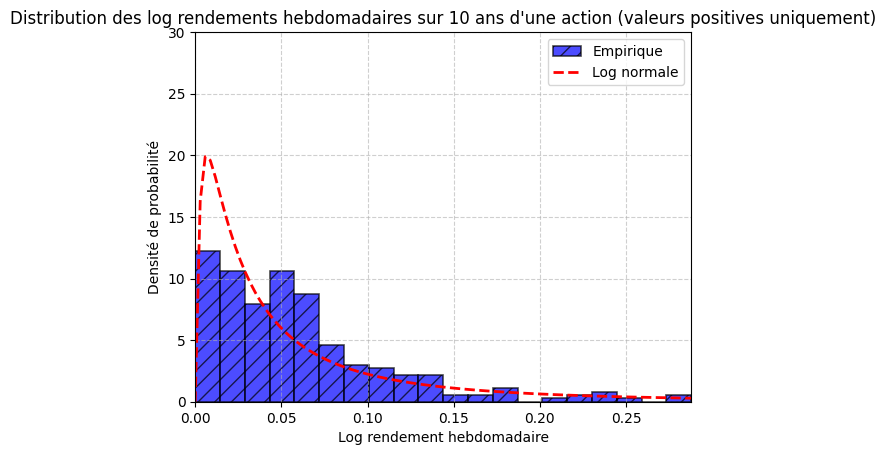

In [ ]:
# Importer les bibliothèques nécessaires
import yfinance as yf
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

apple = yf.Ticker("TSLA")
df = apple.history(start="2015-01-01", end="2023-10-31")

# Calculer les log rendements hebdomadaires
df["Date"] = pd.to_datetime(df.index)  # Utiliser l'index comme date
df["Week"] = df.index.isocalendar().week
df["Year"] = df.index.isocalendar().year
df["LogReturn"] = np.log(df["Close"]) - np.log(df["Close"].shift(1))
df = df.groupby(["Year", "Week"]).agg({"LogReturn": "sum"}).reset_index()
df = df.dropna()

# Filtrer les log rendements négatifs
positive_log_returns = df[df["LogReturn"] > 0]["LogReturn"]

# Calculer les moments statistiques
mean = positive_log_returns.mean()
var = positive_log_returns.var()
skew = positive_log_returns.skew()
kurt = positive_log_returns.kurt()

# Afficher les moments statistiques
print(f"Moyenne: {mean:.4f}")
print(f"Variance: {var:.4f}")
print(f"Asymétrie: {skew:.4f}")
print(f"Kurtosis: {kurt:.4f}")

# Estimer les paramètres de la distribution log normale
lognorm_params = stats.lognorm.fit(positive_log_returns, floc=0)

# Afficher les paramètres estimés
print(f"Paramètres de la distribution log normale: {lognorm_params}")

# Créer un histogramme des log rendements avec des couleurs et des formes différentes
plt.hist(positive_log_returns, bins=20, density=True, label="Empirique", alpha=0.7, color='blue', edgecolor='black', linewidth=1.2, hatch='//')

# Tracer la courbe de la distribution log normale avec une couleur différente et une ligne en pointillés
x = np.linspace(positive_log_returns.min(), positive_log_returns.max(), 100)
y_lognorm = stats.lognorm.pdf(x, *lognorm_params)
plt.plot(x, y_lognorm, label="Log normale", linestyle='--', color='red', linewidth=2)

# Ajouter les légendes et les titres
plt.xlabel("Log rendement hebdomadaire")
plt.ylabel("Densité de probabilité")
plt.title("Distribution des log rendements hebdomadaires sur 10 ans d'une action (valeurs positives uniquement)")
plt.legend()

# Ajuster les limites pour un meilleur affichage
plt.xlim(0, positive_log_returns.max())
plt.ylim(0, 30)

# Afficher la grille
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


**Shapiro-Wilk and Anderson-Darling Tests on normal and log-normal distributions **


In [ ]:
# Importer les bibliothèques nécessaires
import yfinance as yf
import pandas as pd
from scipy.stats import shapiro, anderson

# Télécharger les données historiques de l'action Hermès (HRMS.PA) depuis 5 ans
data = yf.download("TSLA", start="2015-01-01", end="2023-10-31")

# Calculer les rendements quotidiens en pourcentage
data["Returns"] = data["Adj Close"].pct_change() * 100

# Supprimer les valeurs manquantes
data = data.dropna()

# Afficher les 5 premières lignes du tableau de données
print(data.head())

# Effectuer le test de Shapiro-Wilk sur les rendements quotidiens
stat_shapiro, p_shapiro = shapiro(data["Returns"])

# Effectuer le test d'Anderson-Darling sur les rendements quotidiens
result_anderson = anderson(data["Returns"])

# Afficher le résultat du test de Shapiro-Wilk
print("Résultat du test de Shapiro-Wilk:")
print("Statistique de test:", stat_shapiro)
print("Valeur p:", p_shapiro)

# Afficher le résultat du test d'Anderson-Darling
print("\nRésultat du test d'Anderson-Darling:")
print("Statistique de test:", result_anderson.statistic)
print("Valeurs critiques:", result_anderson.critical_values)
print("Niveaux de signification:", result_anderson.significance_level)

# Interpréter le résultat des deux tests
if p_shapiro > 0.05:
    print("Les rendements quotidiens suivent une distribution normale (on ne peut pas rejeter l'hypothèse nulle pour le test de Shapiro-Wilk)")
else:
    print("Les rendements quotidiens ne suivent pas une distribution normale (on rejette l'hypothèse nulle pour le test de Shapiro-Wilk)")

if result_anderson.statistic > result_anderson.critical_values[2]:
    print("Les rendements quotidiens suivent une distribution log-normale (on ne peut pas rejeter l'hypothèse nulle pour le test d'Anderson-Darling)")
else:
    print("Les rendements quotidiens ne suivent pas une distribution log-normale (on rejette l'hypothèse nulle pour le test d'Anderson-Darling)")


[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2015-01-05  14.303333  14.433333  13.810667  14.006000  14.006000  80527500   
2015-01-06  14.004000  14.280000  13.614000  14.085333  14.085333  93928500   
2015-01-07  14.223333  14.318667  13.985333  14.063333  14.063333  44526000   
2015-01-08  14.187333  14.253333  14.000667  14.041333  14.041333  51637500   
2015-01-09  13.928000  13.998667  13.664000  13.777333  13.777333  70024500   

             Returns  
Date                  
2015-01-05 -4.204103  
2015-01-06  0.566424  
2015-01-07 -0.156193  
2015-01-08 -0.156431  
2015-01-09 -1.880163  
Résultat du test de Shapiro-Wilk:
Statistique de test: 0.944389820098877
Valeur p: 3.7273018140686855e-28

Résultat du test d'Anderson-Darling:
Statistique de test: 26.999354491897975
Valeurs critiques: [0.575 0.655 

**Kolmogorov-Smirov test on log-normal / Pareto / Cauchy / Levy distributions**

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import scipy.stats as stats

# Télécharger les données historiques de l'action Tesla
tesla = yf.Ticker("TSLA")
df = tesla.history(start="2015-01-01", end="2023-10-31")

# Calculer les log rendements hebdomadaires
df["Date"] = pd.to_datetime(df.index)
df["Week"] = df.index.isocalendar().week
df["Year"] = df.index.isocalendar().year
df["LogReturn"] = np.log(df["Close"]) - np.log(df["Close"].shift(1))
df = df.groupby(["Year", "Week"]).agg({"LogReturn": "sum"}).reset_index()
df = df.dropna()

# Filtrer les log rendements positifs
positive_log_returns = df[df["LogReturn"] > 0]["LogReturn"]

# Estimer les paramètres de la distribution log-normale
lognorm_params = stats.lognorm.fit(positive_log_returns, floc=0)

# Effectuer le test de Kolmogorov-Smirnov pour la loi log-normale
ks_statistic, ks_pvalue = stats.kstest(positive_log_returns, 'lognorm', lognorm_params)

# Afficher les résultats du test
print("Test de Kolmogorov-Smirnov pour la loi log-normale :")
print(f"Statistique KS : {ks_statistic:.5f}")
print(f"P-valeur : {ks_pvalue:.5f}")
if ks_pvalue < 0.05:
    print("Les données ne suivent pas une loi log-normale.")
else:
    print("Les données suivent une loi log-normale.")

# Estimer les paramètres de la distribution de Pareto
pareto_params = stats.pareto.fit(positive_log_returns, floc=0)

# Effectuer le test de Kolmogorov-Smirnov pour la loi de Pareto
ks_statistic_pareto, ks_pvalue_pareto = stats.kstest(positive_log_returns, 'pareto', pareto_params)

# Afficher les résultats du test pour la loi de Pareto
print("\nTest de Kolmogorov-Smirnov pour la loi de Pareto :")
print(f"Statistique KS : {ks_statistic_pareto:.5f}")
print(f"P-valeur : {ks_pvalue_pareto:.5f}")
if ks_pvalue_pareto < 0.05:
    print("Les données ne suivent pas une loi de Pareto.")
else:
    print("Les données suivent une loi de Pareto.")

# Estimer les paramètres de la distribution de Cauchy
cauchy_params = stats.cauchy.fit(positive_log_returns, floc=0)

# Effectuer le test de Kolmogorov-Smirnov pour la loi de Cauchy
ks_statistic_cauchy, ks_pvalue_cauchy = stats.kstest(positive_log_returns, 'cauchy', cauchy_params)

# Afficher les résultats du test pour la loi de Cauchy
print("\nTest de Kolmogorov-Smirnov pour la loi de Cauchy :")
print(f"Statistique KS : {ks_statistic_cauchy:.5f}")
print(f"P-valeur : {ks_pvalue_cauchy:.5f}")
if ks_pvalue_cauchy < 0.05:
    print("Les données ne suivent pas une loi de Cauchy.")
else:
    print("Les données suivent une loi de Cauchy.")

# Estimer les paramètres de la distribution de Lévy
levy_params = stats.levy.fit(positive_log_returns, floc=0)

# Effectuer le test de Kolmogorov-Smirnov pour la loi de Lévy
ks_statistic_levy, ks_pvalue_levy = stats.kstest(positive_log_returns, 'levy', levy_params)

# Afficher les résultats du test pour la loi de Lévy
print("\nTest de Kolmogorov-Smirnov pour la loi de Lévy :")
print(f"Statistique KS : {ks_statistic_levy:.5f}")
print(f"P-valeur : {ks_pvalue_levy:.5f}")
if ks_pvalue_levy < 0.05:
    print("Les données ne suivent pas une loi de Lévy.")
else:
    print("Les données suivent une loi de Lévy.")

# Estimer les paramètres de la distribution de Student
student_params = stats.t.fit(positive_log_returns)

# Effectuer le test de Kolmogorov-Smirnov pour la loi de Student
ks_statistic_student, ks_pvalue_student = stats.kstest(positive_log_returns, 't', student_params)

# Afficher les résultats du test pour la loi de Student
print("\nTest de Kolmogorov-Smirnov pour la loi de Student :")
print(f"Statistique KS : {ks_statistic_student:.5f}")
print(f"P-valeur : {ks_pvalue_student:.5f}")
if ks_pvalue_student < 0.05:
    print("Les données ne suivent pas une loi de Student.")
else:
    print("Les données suivent une loi de Student.")


Test de Kolmogorov-Smirnov pour la loi log-normale :
Statistique KS : 0.13003
P-valeur : 0.00032
Les données ne suivent pas une loi log-normale.

Test de Kolmogorov-Smirnov pour la loi de Pareto :
Statistique KS : 0.44087
P-valeur : 0.00000
Les données ne suivent pas une loi de Pareto.

Test de Kolmogorov-Smirnov pour la loi de Cauchy :
Statistique KS : 0.50025
P-valeur : 0.00000
Les données ne suivent pas une loi de Cauchy.

Test de Kolmogorov-Smirnov pour la loi de Lévy :
Statistique KS : 0.40920
P-valeur : 0.00000
Les données ne suivent pas une loi de Lévy.

Test de Kolmogorov-Smirnov pour la loi de Student :
Statistique KS : 0.12755
P-valeur : 0.00045
Les données ne suivent pas une loi de Student.


**Autocorrelation modelling**

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


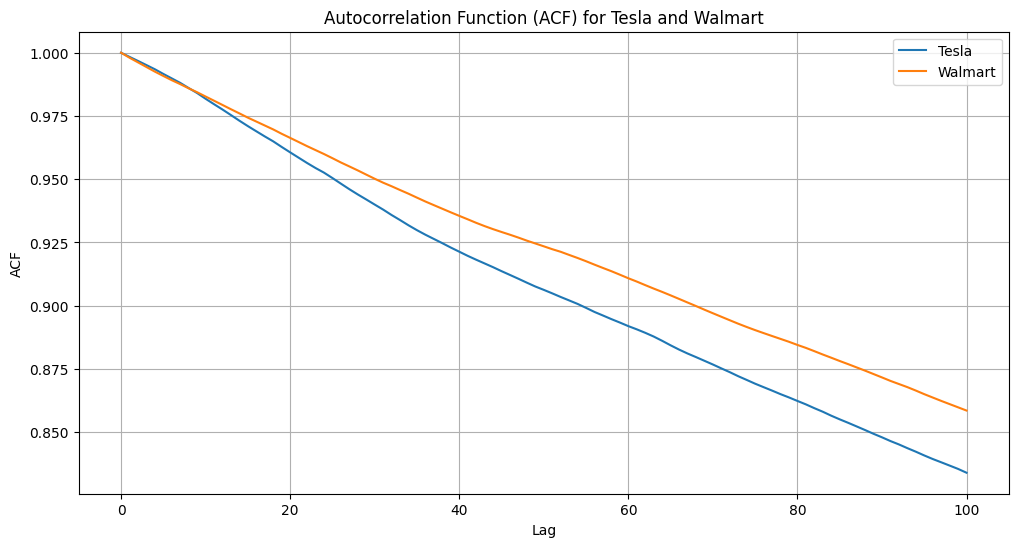

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Téléchargement des données des actions Tesla et Walmart pour les 10 dernières années
start_date = "2015-01-01"
end_date = "2023-10-31"
tesla_data = yf.download("TSLA", start=start_date, end=end_date)
walmart_data = yf.download("WMT", start=start_date, end=end_date)

# Sélection des cours de clôture
tesla_close = tesla_data['Close']
walmart_close = walmart_data['Close']

# Calcul de l'ACF pour Tesla et Walmart
acf_tesla = sm.tsa.acf(tesla_close, nlags=100)
acf_walmart = sm.tsa.acf(walmart_close, nlags=100)

# Création du graphique
plt.figure(figsize=(12, 6))
plt.plot(acf_tesla, label='Tesla')
plt.plot(acf_walmart, label='Walmart')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function (ACF) for Tesla and Walmart')
plt.legend()
plt.grid(True)

# Affichage du graphique
plt.show()


**Normal Distribution ? confirmation of previous results using a new method and modelling (yields do not follow a normal distribution)**

[*********************100%%**********************]  1 of 1 completed


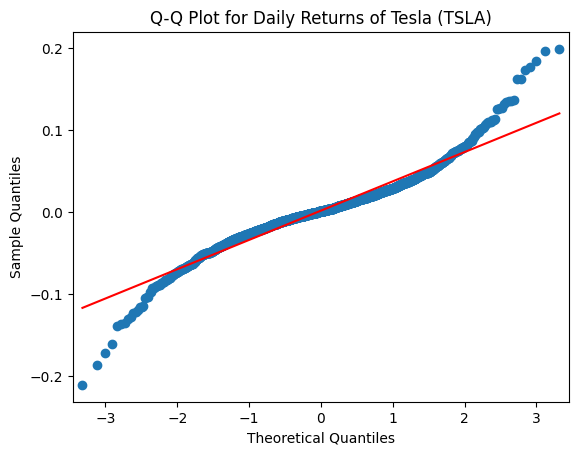

Shapiro-Wilk Test for Tesla (TSLA):
Test Statistic: 0.9443895816802979
P-value: 3.726831164938526e-28
Les rendements de Tesla ne suivent pas une distribution normale.
[*********************100%%**********************]  1 of 1 completed


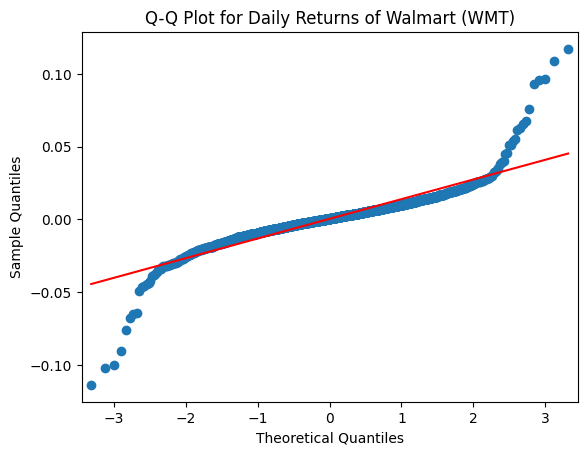

Shapiro-Wilk Test for Walmart (WMT):
Test Statistic: 0.8559067845344543
P-value: 4.4838748261465497e-41
Les rendements de Walmart ne suivent pas une distribution normale.


In [ ]:
import yfinance as yf
import numpy as np
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
from matplotlib import pyplot

# Téléchargement des données de l'action Tesla (TSLA) pour les rendements quotidiens
start_date = "2015-01-01"
end_date = "2023-10-31"
tesla_data = yf.download("TSLA", start=start_date, end=end_date)
tesla_close = tesla_data['Close']

# Calcul des rendements quotidiens pour Tesla
tesla_returns = tesla_close.pct_change().dropna()  # Rendements quotidiens

# Création d'un Q-Q plot pour Tesla
qqplot(tesla_returns, line='s')
pyplot.title('Q-Q Plot for Daily Returns of Tesla (TSLA)')
pyplot.show()

# Test de normalité de Shapiro-Wilk pour Tesla
stat_tesla, p_value_tesla = stats.shapiro(tesla_returns)
print(f"Shapiro-Wilk Test for Tesla (TSLA):")
print(f"Test Statistic: {stat_tesla}")
print(f"P-value: {p_value_tesla}")
if p_value_tesla < 0.05:
    print("Les rendements de Tesla ne suivent pas une distribution normale.")
else:
    print("Les rendements de Tesla suivent une distribution normale.")

# Téléchargement des données de l'action Walmart (WMT) pour les rendements quotidiens
walmart_data = yf.download("WMT", start=start_date, end=end_date)
walmart_close = walmart_data['Close']

# Calcul des rendements quotidiens pour Walmart
walmart_returns = walmart_close.pct_change().dropna()  # Rendements quotidiens

# Création d'un Q-Q plot pour Walmart
qqplot(walmart_returns, line='s')
pyplot.title('Q-Q Plot for Daily Returns of Walmart (WMT)')
pyplot.show()

# Test de normalité de Shapiro-Wilk pour Walmart
stat_walmart, p_value_walmart = stats.shapiro(walmart_returns)
print(f"Shapiro-Wilk Test for Walmart (WMT):")
print(f"Test Statistic: {stat_walmart}")
print(f"P-value: {p_value_walmart}")
if p_value_walmart < 0.05:
    print("Les rendements de Walmart ne suivent pas une distribution normale.")
else:
    print("Les rendements de Walmart suivent une distribution normale.")
